<a href="https://colab.research.google.com/github/angelaguzmanar/Marketing/blob/main/Explorci%C3%B3n_de_datos_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#conectamos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import plotly.graph_objs as go ### para gráficos
import plotly.express as px
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt


In [ ]:
##### conectarse a BD #######
conn= sql.connect('/content/drive/MyDrive/Analitica3/Entrega_Marketing/db_movies')
cur=conn.cursor()

### para ver las tablas que hay en la base de datos
cur.execute("select name from sqlite_master where type='table' ")
cur.fetchall()

[('ratings',),
 ('exploracion',),
 ('ratings_copia',),
 ('moviess',),
 ('movies',),
 ('usuarios_sel',),
 ('movies_sel',),
 ('movies_final',),
 ('ratings_final',)]

In [ ]:
###1
pd.read_sql("select * from moviess", conn)

dfmovies= pd.read_sql("select * from moviess", conn) ### convertir resultados de una consulta en una tabla de pandas
dfmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    9742 non-null   int64 
 1   movieId  9742 non-null   int64 
 2   title    9742 non-null   object
 3   genres   9742 non-null   object
dtypes: int64(2), object(2)
memory usage: 304.6+ KB


In [ ]:
pd.read_sql("select * from ratings", conn)

dfratings= pd.read_sql("select * from ratings", conn) ### convertir resultados de una consulta en una tabla de pandas
dfratings.info()

dfratings.to_sql('ratings_copia',conn, if_exists='replace' ) ## llevar tabla de pandas a base de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


100836

In [ ]:
dfmovies = dfmovies[['movieId','title','genres']]

In [ ]:
dfmovies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
df_explo=pd.read_csv('https://raw.githubusercontent.com/angelaguzmanar/Marketing/main/data_final.csv')
df_explo

,userId,movieId,rating,timestamp,title,(no genres listed),Action,Adventure,Animation,Children,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,1,4.0,964982703,Toy Story (1995),False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,1995
1,5,1,4.0,847434962,Toy Story (1995),False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,1995
2,7,1,4.5,1106635946,Toy Story (1995),False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,1995
3,15,1,2.5,1510577970,Toy Story (1995),False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,1995
4,17,1,4.5,1305696483,Toy Story (1995),False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68953,590,35957,3.0,1258419135,Red Eye (2005),False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,2005
68954,590,43871,2.5,1267151260,Firewall (2006),False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,2006
68955,600,8947,2.5,1237714267,"Grudge, The (2004)",False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,2004
68956,600,32291,3.5,1237763943,Melinda and Melinda (2004),False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004


In [ ]:
# Conecta a la base de datos SQLite
conn = sql.connect('/content/drive/MyDrive/Analitica3/Entrega_Marketing/db_movies')

# Guarda el DataFrame en la base de datos
df_explo.to_sql('exploracion', conn, index=False, if_exists='replace')

68958

In [ ]:
# Conecta a la base de datos SQLite
conn = sql.connect('/content/drive/MyDrive/Analitica3/Entrega_Marketing/db_movies')

cur=conn.cursor()

### para ver las tablas que hay en la base de datos
cur.execute("select name from sqlite_master where type='table' ")
cur.fetchall()

[('ratings',),
 ('moviess',),
 ('movies',),
 ('usuarios_sel',),
 ('movies_sel',),
 ('movies_final',),
 ('ratings_final',),
 ('ratings_copia',),
 ('exploracion',)]

In [ ]:
pd.read_sql("select * from exploracion", conn)

dfmovies= pd.read_sql("select * from exploracion", conn) ### convertir resultados de una consulta en una tabla de pandas
dfmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68958 entries, 0 to 68957
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   userId              68958 non-null  int64  
 1   movieId             68958 non-null  int64  
 2   rating              68958 non-null  float64
 3   timestamp           68958 non-null  int64  
 4   title               68958 non-null  object 
 5   (no genres listed)  68958 non-null  int64  
 6   Action              68958 non-null  int64  
 7   Adventure           68958 non-null  int64  
 8   Animation           68958 non-null  int64  
 9   Children            68958 non-null  int64  
 10  Comedy              68958 non-null  int64  
 11  Crime               68958 non-null  int64  
 12  Documentary         68958 non-null  int64  
 13  Drama               68958 non-null  int64  
 14  Fantasy             68958 non-null  int64  
 15  Film-Noir           68958 non-null  int64  
 16  Horr

In [ ]:
#realizamos el conteo de registros para cada valor de "rating" y los  agrupamos  y los ordena por conteo en orden descendente.

cr=pd.read_sql(""" select rating as rating,
                          count(*) as conteo
                          from exploracion
                          group by rating
                          order by conteo desc""", conn)
###Nombres de columnas con numeros o guiones se deben poner en doble comilla para que se reconozcan

data  = go.Bar( x=cr.rating,y=cr.conteo, text=cr.conteo, textposition="outside")
Layout=go.Layout(title="Count of ratings",xaxis={'title':'Rating'},yaxis={'title':'Count'})
go.Figure(data,Layout)

In [ ]:
### calcular cada usuario cuántas peliculas calificó
rating_users=pd.read_sql(''' select userId,
                         count(*) as cnt_rat
                         from ratings
                        group by userId
                        having cnt_rat < 801
                         order by cnt_rat asc
                         ''',conn )

fig  = px.histogram(rating_users, x= 'cnt_rat', title= 'Hist frecuencia de numero de calificaciones por usario')

fig.show()

In [ ]:
rating_users.describe() #La mayoria se encuentra por debajo de 200, pero si es posible ver 2700 peliculas mas o menos en la mitad de la vida de una perona
#¿Es necesario establecer un limite o se puede dejar?
#El minimo es 20, que es un buen número y el maximo es 2698

,userId,cnt_rat
count,589.000000,589.00000
mean,302.806452,125.93039
std,176.223574,141.26513
min,1.000000,20.00000
25%,149.000000,35.00000
50%,303.000000,66.00000
75%,456.000000,154.00000
max,609.000000,763.00000


In [ ]:
#### verificar cuantas calificaciones tiene cada pelicula
rating_movies=pd.read_sql(''' select movieId ,
                         count(*) as cnt_rat
                         from ratings
                         group by "movieId"
                         order by cnt_rat desc
                         ''',conn )

### graficar distribucion

fig  = px.histogram(rating_movies, x= 'cnt_rat', title= 'Hist frecuencia de numero de calificaciones para cada pelicula')
fig.show()

In [ ]:
rating_movies.describe() #El + del 50% tienen 1 calificacion, muy pocas tienen muchas calificaciones

,movieId,cnt_rat
count,9724.000000,9724.000000
mean,42245.024373,10.369807
std,52191.137320,22.401005
min,1.000000,1.000000
25%,3245.500000,1.000000
50%,7300.000000,3.000000
75%,76739.250000,9.000000
max,193609.000000,329.000000


In [ ]:
#### verificar cuantas calificaciones tiene cada pelicula
rating_movies=pd.read_sql(''' select movieId ,
                         count(*) as cnt_rat
                         from exploracion
                         group by "movieId"
                         having cnt_rat>=5
                         order by cnt_rat desc
                         ''',conn )

### graficar distribucion

fig  = px.histogram(rating_movies, x= 'cnt_rat', title= 'Hist frecuencia de numero de calificaciones para cada pelicula')
fig.show()

In [ ]:
rating_movies.describe()

,movieId,cnt_rat
count,2711.000000,2711.000000
mean,22074.495020,24.417189
std,38175.663987,31.083195
min,1.000000,5.000000
25%,1370.500000,7.000000
50%,3243.000000,13.000000
75%,8971.000000,29.000000
max,187593.000000,308.000000


In [ ]:
df_cop = df_explo.copy()

In [ ]:
genre_counts = df_cop.iloc[:, 6:-1].sum()

In [ ]:
genre_counts

Action         22492
Adventure      18269
Animation       5023
Children        6725
Comedy         26309
Crime          11980
Documentary      412
Drama          28483
Fantasy         8579
Film-Noir        597
Horror          4307
IMAX            3233
Musical         2964
Mystery         5456
Romance        12806
Sci-Fi         12772
Thriller       18860
War             3610
Western         1356
dtype: int64

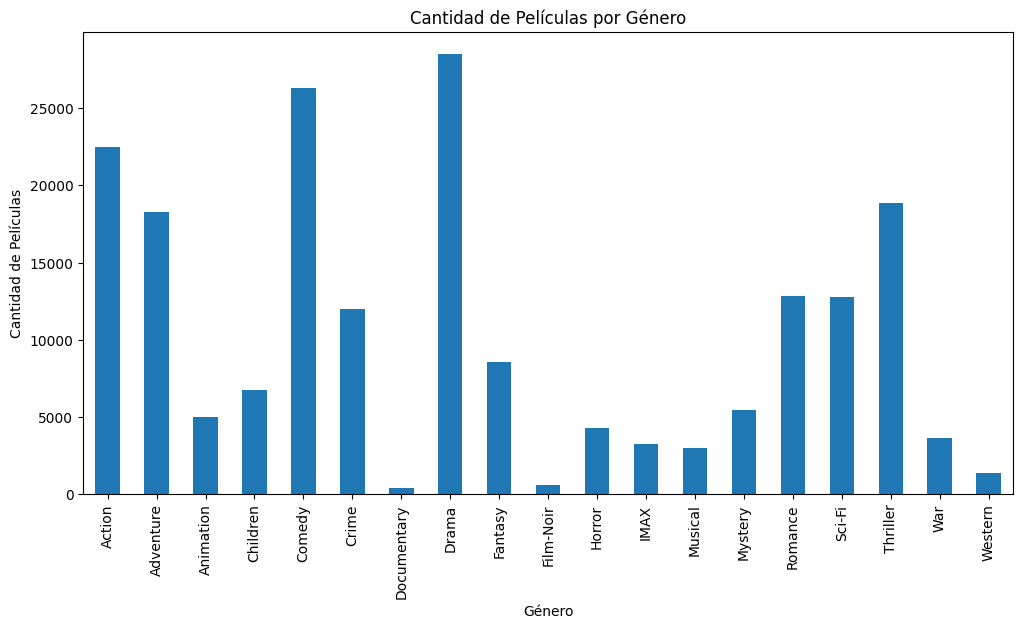

In [ ]:
# Crear un gráfico de barras para mostrar la cantidad de películas por género
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Cantidad de Películas por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Películas')
plt.show()

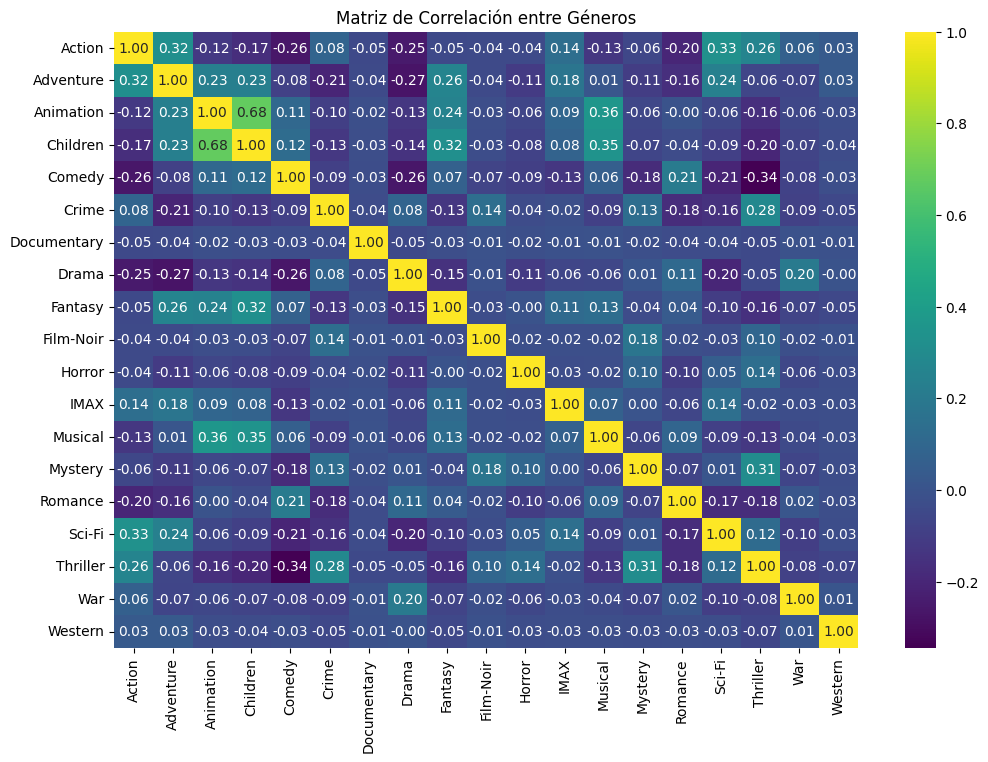

In [ ]:
# Selecciona las columnas de género
genre_columns = df_cop.columns[6:-1]

# Calcula la matriz de correlación entre géneros
genre_correlation = df_cop[genre_columns].corr()

# Visualiza la matriz de correlación como un mapa de calor
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(genre_correlation, cmap='viridis', annot=True, fmt=".2f")
plt.title('Matriz de Correlación entre Géneros')
plt.show() #Con este analisis se observa que peliculas de un genero, tienden a ser de otro, la más "marcada es animación-niños"

In [ ]:
df_explo['timestamp'].unique() #En qué formato estan los timestamp

array([ 964982703,  847434962, 1106635946, ..., 1237714267, 1237763943,
       1277096115])